In [26]:
import gtfs_functions as gtfs
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, shape

In [27]:
routes_df = pd.read_csv('../../data/Project Data-20221123/gtfs3Sept/routes.csv')
routes_df["route_name"] = routes_df["route_short_name"] + ' ' + routes_df["route_long_name"]

routes_df.head()

,route_id,route_short_name,route_long_name,route_type,route_color,route_text_color,route_name
0,2,1,GARE DE L'OUEST - STOCKEL,1,C4008F,FFFFFF,1 GARE DE L'OUEST - STOCKEL
1,4,2,SIMONIS - ELISABETH,1,F57000,FFFFFF,2 SIMONIS - ELISABETH
2,5,3,ESPLANADE - CHURCHILL,0,B5BA05,000000,3 ESPLANADE - CHURCHILL
3,10,4,GARE DU NORD - STALLE (P),0,F25482,000000,4 GARE DU NORD - STALLE (P)
4,1,5,ERASME - HERRMANN-DEBROUX,1,E6B012,FFFFFF,5 ERASME - HERRMANN-DEBROUX


In [28]:
stops_df = pd.read_csv('../../data/Project Data-20221123/gtfs3Sept/stops.csv')
stops_gdf = gpd.GeoDataFrame(stops_df, geometry=gpd.points_from_xy(stops_df.stop_lon, stops_df.stop_lat))

stops_gdf.head()

,stop_id,stop_name,stop_lat,stop_lon,location_type,parent_station,geometry
0,0089,MONTGOMERY,50.838006,4.408970,0.0,37.0,POINT (4.40897 50.83801)
1,0470F,SIMONIS,50.863666,4.329612,0.0,0.0,POINT (4.32961 50.86367)
2,0471,SIMONIS,50.863732,4.329236,0.0,53.0,POINT (4.32924 50.86373)
3,0472,SIMONIS,50.863543,4.329023,0.0,53.0,POINT (4.32902 50.86354)
4,0473F,SIMONIS,50.863418,4.330031,0.0,0.0,POINT (4.33003 50.86342)


In [29]:
trips_df = pd.read_csv('../../data/Project Data-20221123/gtfs3Sept/trips.csv')

trips_df.head()

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id
0,24,235954071,112387248235954071,SIMONIS,1,8902800,087b0196
1,24,235954071,112387249235954071,SIMONIS,1,8902802,087b0196
2,24,235954071,112387253235954071,SIMONIS,1,8902801,087b0196
3,24,235954071,112387254235954071,SIMONIS,1,8902800,087b0196
4,24,235954071,112387255235954071,SIMONIS,1,8902802,087b0196


In [30]:
stop_times_df = pd.read_csv('../../data/Project Data-20221123/gtfs3Sept/stop_times.csv')
stop_times_df = stop_times_df.merge(trips_df, how='inner')
stop_times_df = stop_times_df.merge(stops_gdf, how='inner')
stop_times_df = stop_times_df.drop(columns=['pickup_type', 'drop_off_type', 'trip_headsign', 'block_id', 'stop_lat', 'stop_lon', 'location_type', 'parent_station'])

stop_times_df.head()
# stop_times_df.count()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,route_id,service_id,direction_id,shape_id,stop_name,geometry
0,112387248235954071,21:07:00,21:07:00,4014,1,24,235954071,1,087b0196,BEEKKANT,POINT (4.32341 50.85424)
1,112387249235954071,21:23:00,21:23:00,4014,1,24,235954071,1,087b0196,BEEKKANT,POINT (4.32341 50.85424)
2,112387253235954071,22:24:00,22:24:00,4014,1,24,235954071,1,087b0196,BEEKKANT,POINT (4.32341 50.85424)
3,112387254235954071,22:40:00,22:40:00,4014,1,24,235954071,1,087b0196,BEEKKANT,POINT (4.32341 50.85424)
4,112387255235954071,22:57:00,22:57:00,4014,1,24,235954071,1,087b0196,BEEKKANT,POINT (4.32341 50.85424)


In [31]:
shapes_df = pd.read_csv('../../data/Project Data-20221123/gtfs3Sept/shapes.csv')
shapes_gdf = gpd.GeoDataFrame(shapes_df, geometry=gpd.points_from_xy(shapes_df.shape_pt_lon, shapes_df.shape_pt_lat))
shapes_gdf = shapes_gdf.groupby(['shape_id'])['geometry'].apply(lambda x: LineString(x.tolist())).reset_index(name='geometry')

shapes_gdf.head()

,shape_id,geometry
0,001m0042,"LINESTRING (4.46454 50.84187, 4.46361 50.84327..."
1,001m0043,"LINESTRING (4.32095 50.84900, 4.32108 50.84924..."
2,001m0044,"LINESTRING (4.32095 50.84900, 4.32108 50.84924..."
3,001m0045,"LINESTRING (4.46441 50.84186, 4.46389 50.84268..."
4,001m0046,"LINESTRING (4.39828 50.83936, 4.39846 50.83933..."


In [1]:
from gtfs_segments import get_gtfs_segments
segments_gdf = get_gtfs_segments('/Users/nikorubas/Downloads/Project Data-20221123/gtfs3Sept.zip')

segments_gdf.head()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be m

,segment_id,route_id,direction_id,traversals,distance,stop_id1,stop_id2,geometry
0,1664-3800-1,71,1,2,582.533358,1664,3800,"LINESTRING (4.33635 50.83852, 4.33635 50.83855..."
1,3800-3802-1,71,1,2,362.167503,3800,3802,"LINESTRING (4.33123 50.83563, 4.33123 50.83563..."
2,3802-3804B-1,71,1,2,250.191688,3802,3804B,"LINESTRING (4.32800 50.83309, 4.32800 50.83309..."
3,3804B-3805-1,71,1,2,442.203988,3804B,3805,"LINESTRING (4.32504 50.83211, 4.32504 50.83211..."
4,3805-1666-1,71,1,2,323.900033,3805,1666,"LINESTRING (4.31943 50.83046, 4.31943 50.83046..."


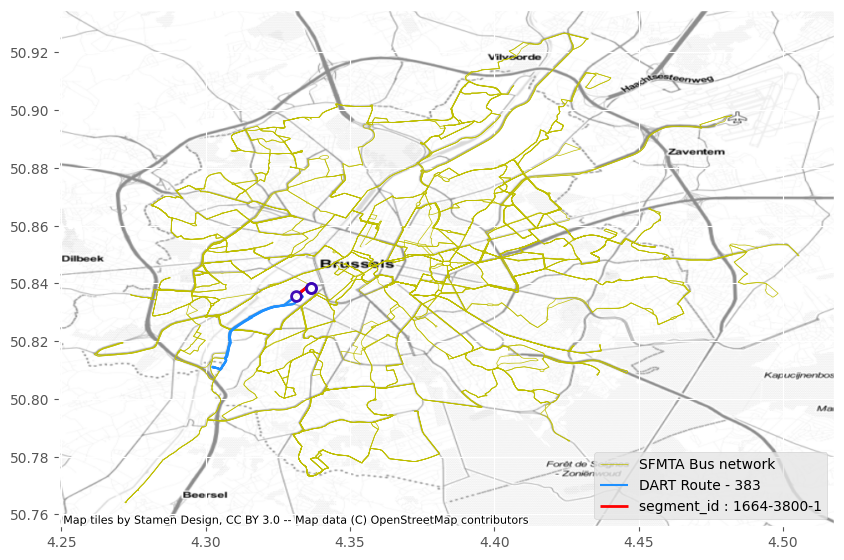

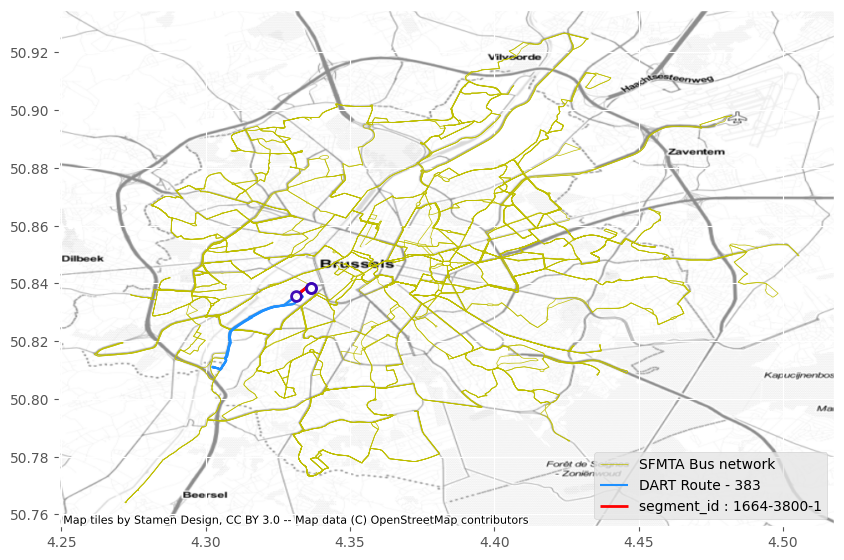

In [37]:
from gtfs_segments import view_spacings
view_spacings(segments_gdf, route='71', segment='1664-3800-1', basemap=True, show_stops=True)